<a href="https://colab.research.google.com/github/rajaganesh1357/Time_Series_Repository/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/rajaganesh1357/Dataset/main/DailyDelhiClimate.csv")

In [42]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1575 non-null   object 
 1   meantemp      1575 non-null   float64
 2   humidity      1575 non-null   float64
 3   wind_speed    1575 non-null   float64
 4   meanpressure  1575 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.6+ KB
None


In [ ]:
data['date']=pd.to_datetime(data['date'],format='%d-%m-%Y')

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

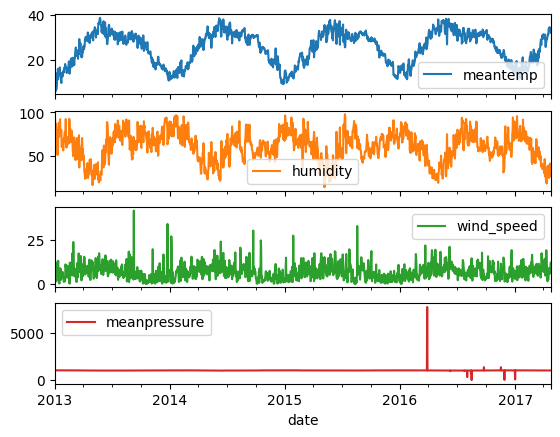

In [ ]:
data.set_index(data['date'])[['meantemp','humidity','wind_speed','meanpressure']].plot(subplots=True)

In [ ]:
input = data[['meantemp','humidity','wind_speed','meanpressure']]

In [ ]:
input.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1575.000000,1575.000000,1575.000000,1575.000000
mean,25.231582,60.420115,6.903642,1010.589745
std,7.337316,16.956083,4.508803,175.298310
min,6.000000,13.428571,0.000000,-3.041667
25%,18.516667,49.750000,3.700000,1001.875000
50%,27.166667,62.380952,6.370000,1009.000000
75%,31.142857,72.125000,9.262500,1015.183334
max,38.714286,98.000000,42.220000,7679.333333


In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(input)

In [ ]:
features=scaled
target=scaled[:,0]

In [ ]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.12227074, 0.84037162, 0.        , 0.13260331],
         [0.04279476, 0.92905405, 0.07058266, 0.132881  ]]]),
 array([0.0356623]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [ ]:
print("x_train ",x_train.shape)
print("y_train ",y_train.shape)
print("x_test ",x_test.shape)
print("y_test ",y_test.shape)

x_train  (1260, 4)
y_train  (1260,)
x_test  (315, 4)
y_test  (315,)


In [ ]:
win_length=7
batch_size=32
num_features=4
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [43]:
train_generator[0]

(array([[[0.12227074, 0.84037162, 0.        , 0.13260331],
         [0.04279476, 0.92905405, 0.07058266, 0.132881  ],
         [0.0356623 , 0.86993243, 0.10974262, 0.13299381],
         [0.08151383, 0.68468468, 0.02921206, 0.13279856],
         [0.        , 0.86796171, 0.08763619, 0.13271178],
         [0.03056769, 0.82027027, 0.03505448, 0.13290703],
         [0.03056769, 0.77060811, 0.14921838, 0.13316737]],
 
        [[0.04279476, 0.92905405, 0.07058266, 0.132881  ],
         [0.0356623 , 0.86993243, 0.10974262, 0.13299381],
         [0.08151383, 0.68468468, 0.02921206, 0.13279856],
         [0.        , 0.86796171, 0.08763619, 0.13271178],
         [0.03056769, 0.82027027, 0.03505448, 0.13290703],
         [0.03056769, 0.77060811, 0.14921838, 0.13316737],
         [0.08733624, 0.59459459, 0.16918184, 0.13300001]],
 
        [[0.0356623 , 0.86993243, 0.10974262, 0.13299381],
         [0.08151383, 0.68468468, 0.02921206, 0.13279856],
         [0.        , 0.86796171, 0.08763619, 0.13

In [50]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 7, 64)             17664     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 7, 64)             0         
                                                                 
 lstm_13 (LSTM)              (None, 7, 64)             33024     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 7, 64)             0         
                                                                 
 dropout_8 (Dropout)         (None, 7, 64)             0         
                                                                 
 lstm_14 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_9 (Dropout)         (None, 64)               

In [52]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])


Epoch 1/50


<ipython-input-52-3b00c92e395b>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=50,


40/40 [==============================] - 5s 30ms/step - loss: 0.1088 - mean_absolute_error: 0.2667 - val_loss: 0.0174 - val_mean_absolute_error: 0.1076
Epoch 2/50
40/40 [==============================] - 1s 12ms/step - loss: 0.0188 - mean_absolute_error: 0.1102 - val_loss: 0.0089 - val_mean_absolute_error: 0.0749
Epoch 3/50
40/40 [==============================] - 0s 11ms/step - loss: 0.0104 - mean_absolute_error: 0.0808 - val_loss: 0.0077 - val_mean_absolute_error: 0.0707
Epoch 4/50
40/40 [==============================] - 0s 11ms/step - loss: 0.0116 - mean_absolute_error: 0.0851 - val_loss: 0.0065 - val_mean_absolute_error: 0.0657
Epoch 5/50
40/40 [==============================] - 0s 12ms/step - loss: 0.0087 - mean_absolute_error: 0.0728 - val_loss: 0.0061 - val_mean_absolute_error: 0.0633
Epoch 6/50
40/40 [==============================] - 0s 10ms/step - loss: 0.0083 - mean_absolute_error: 0.0714 - val_loss: 0.0059 - val_mean_absolute_error: 0.0620
Epoch 7/50
40/40 [===============

In [53]:
model.evaluate(test_generator)

10/10 [==============================] - 0s 3ms/step - loss: 0.0060 - mean_absolute_error: 0.0630


[0.0059857540763914585, 0.06303045898675919]

In [54]:
predictions=model.predict(test_generator)

10/10 [==============================] - 1s 3ms/step


In [55]:
predictions

array([[0.8600235 ],
       [0.8654834 ],
       [0.8569445 ],
       [0.8536179 ],
       [0.8517197 ],
       [0.83547425],
       [0.823541  ],
       [0.847547  ],
       [0.85538125],
       [0.8640702 ],
       [0.86916184],
       [0.85240793],
       [0.8345567 ],
       [0.8165117 ],
       [0.79636645],
       [0.80221546],
       [0.772677  ],
       [0.7433429 ],
       [0.7358645 ],
       [0.76294965],
       [0.7886613 ],
       [0.80496967],
       [0.799601  ],
       [0.786806  ],
       [0.7733432 ],
       [0.778154  ],
       [0.7598044 ],
       [0.74231607],
       [0.72234833],
       [0.7156509 ],
       [0.7056761 ],
       [0.71203935],
       [0.71836996],
       [0.7658082 ],
       [0.80190104],
       [0.83902633],
       [0.8317878 ],
       [0.8060639 ],
       [0.7763768 ],
       [0.7421534 ],
       [0.7161718 ],
       [0.6974073 ],
       [0.6700312 ],
       [0.6538526 ],
       [0.6626418 ],
       [0.66625476],
       [0.700701  ],
       [0.739

In [56]:
x_test

array([[0.81386463, 0.49303209, 0.28090952, 0.13027926],
       [0.8783115 , 0.41903153, 0.24901311, 0.13006069],
       [0.84061135, 0.44763514, 0.26984503, 0.13043384],
       ...,
       [0.82227074, 0.32483108, 0.21056371, 0.13077228],
       [0.82150655, 0.16638514, 0.23596637, 0.13084061],
       [0.79475983, 0.16216216, 0.28794749, 0.13110328]])

In [57]:
x_test[:,1:][win_length:]

array([[0.57654139, 0.21124467, 0.13055587],
       [0.56028294, 0.17571649, 0.1307674 ],
       [0.45153326, 0.13915206, 0.13052396],
       [0.39178632, 0.18385836, 0.13034435],
       [0.50253378, 0.22890302, 0.13057331],
       [0.52072072, 0.1814306 , 0.13061282],
       [0.56545608, 0.18933562, 0.13041648],
       [0.72888514, 0.12874738, 0.13075926],
       [0.53737331, 0.20014211, 0.13071858],
       [0.55304054, 0.16090321, 0.13028632],
       [0.70912162, 0.19777357, 0.13089756],
       [0.78716216, 0.12390455, 0.13035248],
       [0.76499155, 0.04663074, 0.13033621],
       [0.74355997, 0.082455  , 0.13018977],
       [0.65339949, 0.12642113, 0.12998639],
       [0.59876126, 0.21029302, 0.13015615],
       [0.58614865, 0.1401883 , 0.13026299],
       [0.73828829, 0.12869098, 0.13022557],
       [0.62236064, 0.15943273, 0.13014096],
       [0.61792652, 0.11132165, 0.13005147],
       [0.69182855, 0.19058898, 0.13027113],
       [0.78937922, 0.13175036, 0.13044197],
       [0.

In [58]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [59]:
df_pred

,0,0,1,2
0,0.860023,0.576541,0.211245,0.130556
1,0.865483,0.560283,0.175716,0.130767
2,0.856945,0.451533,0.139152,0.130524
3,0.853618,0.391786,0.183858,0.130344
4,0.851720,0.502534,0.228903,0.130573
...,...,...,...,...
303,0.762221,0.166385,0.131750,0.130385
304,0.779819,0.306799,0.164910,0.130548
305,0.801976,0.324831,0.210564,0.130772
306,0.815848,0.166385,0.235966,0.130841


In [60]:
rev_trans=scaler.inverse_transform(df_pred)

In [61]:
rev_trans

array([[  34.13505445,   62.1875    ,    8.91875   ,  999.9375    ],
       [  34.31367133,   60.8125    ,    7.41875   , 1001.5625    ],
       [  34.03432726,   51.61538462,    5.875     ,  999.6923077 ],
       ...,
       [  32.23608647,   40.9       ,    8.89      , 1001.6       ],
       [  32.68986874,   27.5       ,    9.9625    , 1002.125     ],
       [  33.42575032,   27.14285714,   12.15714286, 1004.142857  ]])

In [62]:
df_final=input[predictions.shape[0]*-1:]

In [63]:
df_final.count()

meantemp        308
humidity        308
wind_speed      308
meanpressure    308
dtype: int64

In [64]:
df_final['App_Pred']=rev_trans[:,0]

<ipython-input-64-62669267b60b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred']=rev_trans[:,0]


In [65]:
df_final

,meantemp,humidity,wind_speed,meanpressure,App_Pred
1267,32.875000,62.187500,8.918750,999.937500,34.135054
1268,33.125000,60.812500,7.418750,1001.562500,34.313671
1269,33.846154,51.615385,5.875000,999.692308,34.034327
1270,36.437500,46.562500,7.762500,998.312500,33.925500
1271,35.428571,55.928571,9.664286,1000.071429,33.863401
...,...,...,...,...,...
1570,34.500000,27.500000,5.562500,998.625000,30.935519
1571,34.250000,39.375000,6.962500,999.875000,31.511214
1572,32.900000,40.900000,8.890000,1001.600000,32.236086
1573,32.875000,27.500000,9.962500,1002.125000,32.689869


<Axes: >

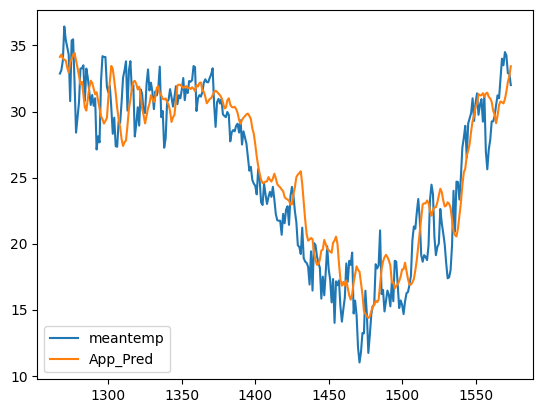

In [66]:
df_final[['meantemp','App_Pred']].plot()

In [67]:
future_dates = pd.date_range(start='2017-1-1',periods=308,freq='d')

In [68]:
df_final['date']=future_dates

<ipython-input-68-30c49064cbf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['date']=future_dates


In [69]:
df_final

,meantemp,humidity,wind_speed,meanpressure,App_Pred,date
1267,32.875000,62.187500,8.918750,999.937500,34.135054,2017-01-01
1268,33.125000,60.812500,7.418750,1001.562500,34.313671,2017-01-02
1269,33.846154,51.615385,5.875000,999.692308,34.034327,2017-01-03
1270,36.437500,46.562500,7.762500,998.312500,33.925500,2017-01-04
1271,35.428571,55.928571,9.664286,1000.071429,33.863401,2017-01-05
...,...,...,...,...,...,...
1570,34.500000,27.500000,5.562500,998.625000,30.935519,2017-10-31
1571,34.250000,39.375000,6.962500,999.875000,31.511214,2017-11-01
1572,32.900000,40.900000,8.890000,1001.600000,32.236086,2017-11-02
1573,32.875000,27.500000,9.962500,1002.125000,32.689869,2017-11-03


<Axes: xlabel='date'>

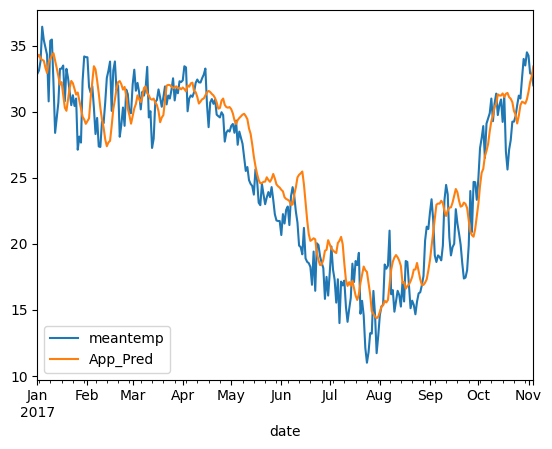

In [70]:
df_final.set_index('date')[['meantemp','App_Pred']].plot()